In [1]:
import pandas as pd
path1="/content/Sales_Data.xlsx"
sales = pd.read_excel(path1)
sales.head()

,DATE,PARTICULARS,BUYER,QUANTITY,UNIT,RATE,VALUE,TYPE
0,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,9,JOB,343,3087.0,Labor & Miscellaneous Services
1,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,14,JOB,1176,16464.0,Labor & Miscellaneous Services
2,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,14,JOB,882,12348.0,Labor & Miscellaneous Services
3,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,2,JOB,2744,5488.0,Labor & Miscellaneous Services
4,2024-10-01,Dismantling and shifting charges,Honeywell Automation India Ltd.,14,JOB,196,2744.0,Labor & Miscellaneous Services


In [2]:
path2="/content/Purchase_Data.xlsx"
purchase = pd.read_excel(path2)
purchase.head()

,Date,Particulars,Supplier,Quantity,UNITS,Rate,Value
0,2024-10-07,Fire Alarm Panel,JP Fire Safety,1,Unit,4700.0,4700.0
1,2024-10-07,Manual Call Point,JP Fire Safety,2,Unit,325.0,650.0
2,2024-10-07,Hooter,JP Fire Safety,2,Unit,700.0,1400.0
3,2024-10-07,Response Indicator,JP Fire Safety,15,Unit,50.0,750.0
4,2024-10-07,Smoke Detector,JP Fire Safety,30,Unit,570.0,17100.0


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         249 non-null    datetime64[ns]
 1   PARTICULARS  249 non-null    object        
 2   BUYER        249 non-null    object        
 3   QUANTITY     249 non-null    int64         
 4   UNIT         249 non-null    object        
 5   RATE         249 non-null    object        
 6   VALUE        249 non-null    float64       
 7   TYPE         249 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 15.7+ KB


In [4]:
sales.isnull().sum()

,0
DATE,0
PARTICULARS,0
BUYER,0
QUANTITY,0
UNIT,0
RATE,0
VALUE,0
TYPE,0


# DATA CLEANING AND PREPROCESSING

In [5]:
print(type(sales))
print(type(purchase))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
print(sales.columns)
print(purchase.columns)

Index(['DATE', 'PARTICULARS', 'BUYER', 'QUANTITY', 'UNIT', 'RATE', 'VALUE ',
       'TYPE'],
      dtype='object')
Index(['Date', 'Particulars', 'Supplier', 'Quantity', 'UNITS', 'Rate',
       'Value'],
      dtype='object')


In [7]:
# Convert DATE column to datetime format

sales['DATE'] = pd.to_datetime(sales['DATE'])
purchase['Date'] = pd.to_datetime(purchase['Date'])

In [8]:
# Clean column names
sales.columns = sales.columns.str.strip().str.upper()
purchase.columns = purchase.columns.str.strip().str.upper()  # Removes leading/trailing spaces

In [9]:
print(sales['DATE'].dtype) #check conversion
print(purchase['DATE'].dtype)

datetime64[ns]
datetime64[ns]


In [10]:
# discrepancy in customer names problem-


buyer_mapping = {
    "H&M HENNES AND MAURITZ INDIA PRIVATE LIMITED": "H&M Hennes & Mauritz",
    "H&M Hennes & Mauritz Retail Pvt. Ltd": "H&M Hennes & Mauritz",
    "H&M Hennes & Mauritz Retail Pvt. Ltd.": "H&M Hennes & Mauritz",
    "DLF LTD": "DLF",
    "DLF PROPERTY DEVELOPERS LIMITED": "DLF"
}

# Apply the mapping
sales['BUYER'] = sales['BUYER'].replace(buyer_mapping)


In [11]:
# Dropping rows where the buyer is 'V P Fire & Security System'
# Note:
# 'V P Fire & Security System' is the second company owned by the director of 'VP Fire System Private Limited'.
# Kindly note: Both companies have very similar names though they are different.
# My analysis is being conducted for: 'VP Fire System Private Limited'.

sales = sales[sales['BUYER'] != 'V P Fire & Security System'].reset_index(drop=True)

# SALES VS PURCHASE

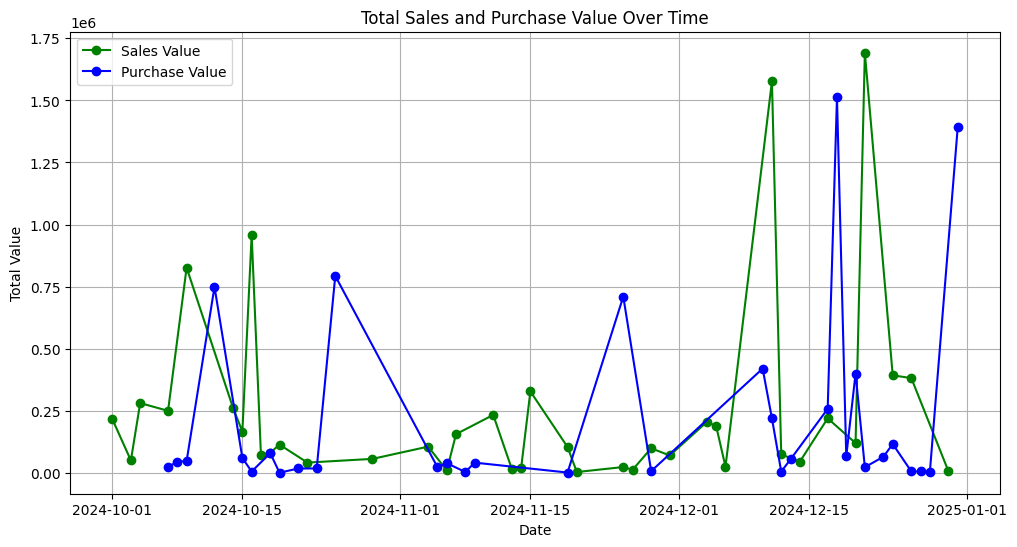

In [12]:
import matplotlib.pyplot as plt

# Group by date and sum the value
sales_daily = sales.groupby('DATE')['VALUE'].sum().reset_index()
purchase_daily = purchase.groupby('DATE')['VALUE'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sales_daily['DATE'], sales_daily['VALUE'], label='Sales Value', color='green', marker='o')
plt.plot(purchase_daily['DATE'], purchase_daily['VALUE'], label='Purchase Value', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.title('Total Sales and Purchase Value Over Time')
plt.legend()
plt.grid(True)
#plt.tight_layout()
plt.show()

In [13]:
# Calculate total revenue for sales and purchase
total_sales_revenue = sales['VALUE'].sum()
total_purchase_revenue = purchase['VALUE'].sum()

# Print the total revenues
print(f"Total Sales Revenue: {total_sales_revenue}")
print(f"Total Purchase Revenue: {total_purchase_revenue}")


Total Sales Revenue: 9484401.600000001
Total Purchase Revenue: 7217693.5200000005


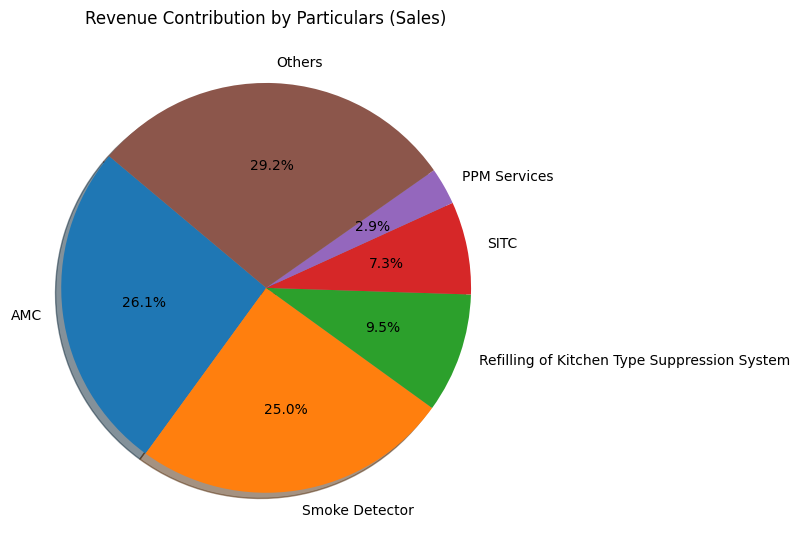

In [14]:
# Group by 'particulars' and sum the 'value'
particulars_revenue = sales.groupby('PARTICULARS')['VALUE'].sum().sort_values(ascending=False)

# Select top N particulars and combine the rest into 'Others'
top_n = 5
top_particulars = particulars_revenue.head(top_n)
others = particulars_revenue[top_n:].sum()
top_particulars['Others'] = others

# Plot pie chart
plt.figure(figsize=(8, 8))
top_particulars.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Revenue Contribution by Particulars (Sales)')
plt.ylabel('')  # Hide y-label for aesthetics
plt.tight_layout()
plt.show()

<ipython-input-40-06298c671bb6>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




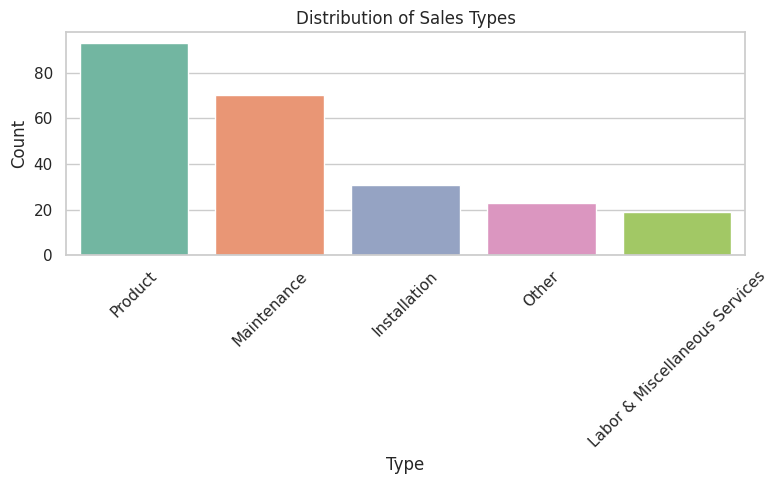

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Count the occurrences of each TYPE
type_counts = sales['TYPE'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Sales Types')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-41-d65f02c6f755>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




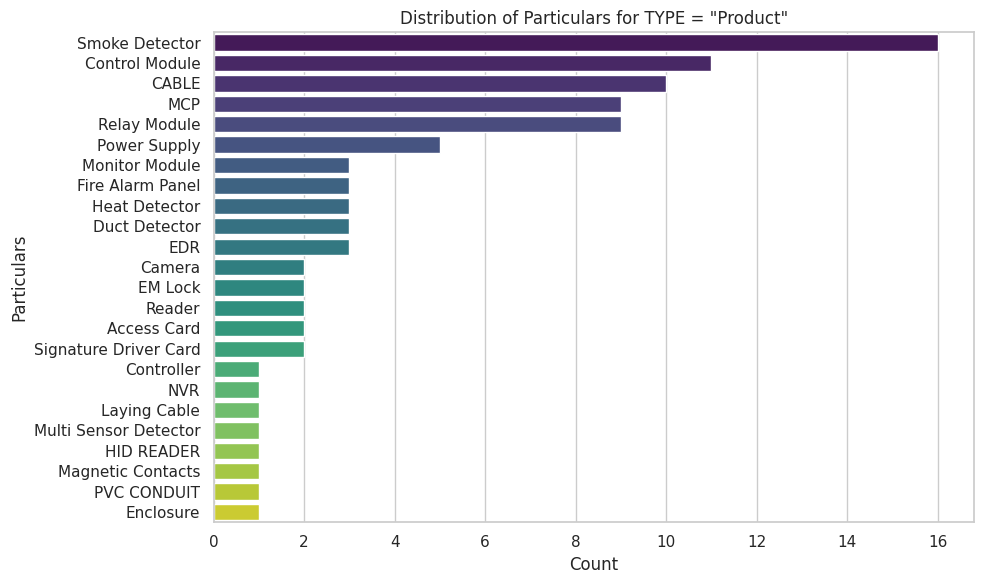

In [41]:
# Filter rows where TYPE is 'Product'
product_sales = sales[sales['TYPE'] == 'Product']

# Count the occurrences of each PARTICULARS
particular_counts = product_sales['PARTICULARS'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y=particular_counts.index, x=particular_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Particulars')
plt.title('Distribution of Particulars for TYPE = "Product"')
plt.tight_layout()
plt.show()


# CUSTOMER SEGMENTATION

## RFM

In [15]:
import datetime as dt

# reference_date is the date being defined as the day after the most recent transaction in the entire dataset
reference_date = sales['DATE'].max() + dt.timedelta(days=1)


print(sales['DATE'].max()) #date of last transaction in the dataset
print(reference_date) #added +1

2024-12-30 00:00:00
2024-12-31 00:00:00


In [16]:
# Group by BUYER to calculate RFM metrics
rfm = sales.groupby('BUYER').agg({
    'DATE': lambda x: (reference_date - x.max()).days,  # Recency
    'PARTICULARS': 'count',                           # Frequency
    'VALUE': 'sum'                                    # Monetary
}).reset_index()

#RECENCY: how many days ago the last purchase was made w.r.t. reference date?
#FREQUENCY: How many transaction did the client make in these 3 months?
#VALUE: total amount spent by the customer in these 3 months

# Rename columns
rfm.rename(columns={'DATE': 'Recency', 'PARTICULARS': 'Frequency', 'VALUE': 'Monetary'}, inplace=True)
rfm_k=rfm.copy() #for k-means clustering
rfm.head(25)

,BUYER,Recency,Frequency,Monetary
0,AK Solution and Security System,11,4,218200.00
1,ASR Engineering & Innovation,75,5,106150.00
2,CONTINENTAL INDIA PRIVATE LIMITED,55,1,10000.00
3,Capital Record Centre Pvt. Ltd.,85,1,250000.00
4,Colliers International (India) Property Servic...,25,5,223257.16
5,DLF,26,3,200500.00
6,Dr. Anurag Sharma,88,6,53775.00
7,EDF INDIA PRIVATE LIMITED,42,1,1400.00
8,Enviro Integrated Facility Services Pvt. Ltd.,36,10,403650.00
9,H&M Hennes & Mauritz,7,6,104850.00


In [17]:
# Ensure the columns are numeric
rfm['Recency'] = pd.to_numeric(rfm['Recency'], errors='coerce')
rfm['Frequency'] = pd.to_numeric(rfm['Frequency'], errors='coerce')
rfm['Monetary'] = pd.to_numeric(rfm['Monetary'], errors='coerce')

In [18]:
# Calculate quantiles (after ensuring numeric values)
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75])

# Assign RFM scores
def RScore(x, p, d):
    if p == 'Recency':
        if x <= d.loc[0.25, p]:
            return 4
        elif x <= d.loc[0.50, p]:
            return 3
        elif x <= d.loc[0.75, p]:
            return 2
        else:
            return 1
    else:
        if x <= d.loc[0.25, p]:
            return 1
        elif x <= d.loc[0.50, p]:
            return 2
        elif x <= d.loc[0.75, p]:
            return 3
        else:
            return 4


#x is the value to be scored (RFM)
#p is the column name being passed as string
#d is dataframe containing the quantiles

In [19]:
# Apply RScore to each column
rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency', quantiles,))
rfm['F'] = rfm['Frequency'].apply(RScore, args=('Frequency', quantiles,))
rfm['M'] = rfm['Monetary'].apply(RScore, args=('Monetary', quantiles,))

# Display first 25 rows
rfm.head(25)

,BUYER,Recency,Frequency,Monetary,R,F,M
0,AK Solution and Security System,11,4,218200.00,4,3,3
1,ASR Engineering & Innovation,75,5,106150.00,2,3,2
2,CONTINENTAL INDIA PRIVATE LIMITED,55,1,10000.00,2,1,1
3,Capital Record Centre Pvt. Ltd.,85,1,250000.00,1,1,4
4,Colliers International (India) Property Servic...,25,5,223257.16,3,3,3
5,DLF,26,3,200500.00,3,2,3
6,Dr. Anurag Sharma,88,6,53775.00,1,3,2
7,EDF INDIA PRIVATE LIMITED,42,1,1400.00,2,1,1
8,Enviro Integrated Facility Services Pvt. Ltd.,36,10,403650.00,3,4,4
9,H&M Hennes & Mauritz,7,6,104850.00,4,3,2


In [20]:
# Combine R, F, and M scores into a single string segment
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Calculate the sum of R, F, and M scores
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

In [21]:
rfm.head(25)

,BUYER,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,AK Solution and Security System,11,4,218200.00,4,3,3,433,10
1,ASR Engineering & Innovation,75,5,106150.00,2,3,2,232,7
2,CONTINENTAL INDIA PRIVATE LIMITED,55,1,10000.00,2,1,1,211,4
3,Capital Record Centre Pvt. Ltd.,85,1,250000.00,1,1,4,114,6
4,Colliers International (India) Property Servic...,25,5,223257.16,3,3,3,333,9
5,DLF,26,3,200500.00,3,2,3,323,8
6,Dr. Anurag Sharma,88,6,53775.00,1,3,2,132,6
7,EDF INDIA PRIVATE LIMITED,42,1,1400.00,2,1,1,211,4
8,Enviro Integrated Facility Services Pvt. Ltd.,36,10,403650.00,3,4,4,344,11
9,H&M Hennes & Mauritz,7,6,104850.00,4,3,2,432,9


In [22]:
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']

def assign_segment(score):
    if score < 5:
        return 'Low-Value'
    elif score < 9:
        return 'Mid-Value'
    else:
        return 'High-Value'

rfm['RFM_Segment_Label'] = rfm['RFM_Score'].apply(assign_segment)

In [23]:
# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # No limit on line width
pd.set_option('display.max_colwidth', None) # No limit on column width

rfm.head(20)

,BUYER,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Segment_Label
0,AK Solution and Security System,11,4,218200.00,4,3,3,433,10,High-Value
1,ASR Engineering & Innovation,75,5,106150.00,2,3,2,232,7,Mid-Value
2,CONTINENTAL INDIA PRIVATE LIMITED,55,1,10000.00,2,1,1,211,4,Low-Value
3,Capital Record Centre Pvt. Ltd.,85,1,250000.00,1,1,4,114,6,Mid-Value
4,Colliers International (India) Property Services Pvt Ltd,25,5,223257.16,3,3,3,333,9,High-Value
5,DLF,26,3,200500.00,3,2,3,323,8,Mid-Value
6,Dr. Anurag Sharma,88,6,53775.00,1,3,2,132,6,Mid-Value
7,EDF INDIA PRIVATE LIMITED,42,1,1400.00,2,1,1,211,4,Low-Value
8,Enviro Integrated Facility Services Pvt. Ltd.,36,10,403650.00,3,4,4,344,11,High-Value
9,H&M Hennes & Mauritz,7,6,104850.00,4,3,2,432,9,High-Value


In [24]:
import plotly.express as px

In [25]:
# Calculate the count of customers in each segment
segment_counts = rfm['RFM_Segment_Label'].value_counts().reset_index()

# Rename the columns of the segment counts DataFrame
segment_counts.columns = ['RFM_Segment', 'Count']

# Sort the segment counts by the 'RFM_Segment' label
segment_counts = segment_counts.sort_values('RFM_Segment')

In [26]:
# Create the bar chart using Plotly
fig = px.bar(segment_counts,
             x='RFM_Segment',
             y='Count',
             title='Customer Distribution by RFM Segment',
             labels={'RFM_Segment': 'RFM Segment', 'Count': 'Number of Customers'},
             color='RFM_Segment',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             width=700,
             height=500)

# Show the plot
fig.show()

In [27]:
# Initialize a new column 'RFM_Customer_Segments' with empty strings
rfm['RFM_Customer_Segments'] = ''

# Assign customer segments based on RFM_Score ranges
rfm.loc[rfm['RFM_Score'] >= 9, 'RFM_Customer_Segments'] = 'VIP/Loyal'
rfm.loc[(rfm['RFM_Score'] >= 6) & (rfm['RFM_Score'] < 9), 'RFM_Customer_Segments'] = 'Potential Loyal'
rfm.loc[(rfm['RFM_Score'] >= 5) & (rfm['RFM_Score'] < 6), 'RFM_Customer_Segments'] = 'At Risk Customers'
rfm.loc[(rfm['RFM_Score'] >= 4) & (rfm['RFM_Score'] < 5), 'RFM_Customer_Segments'] = "Can't Lose"
rfm.loc[rfm['RFM_Score'] < 4, 'RFM_Customer_Segments'] = 'Lost'

# Calculate the count of customers in each segment and sort by index (segment name)
segment_counts = rfm['RFM_Customer_Segments'].value_counts().sort_index()
print("Customer Counts per RFM Segment:\n", segment_counts)

Customer Counts per RFM Segment:
 RFM_Customer_Segments
At Risk Customers    3
Can't Lose           3
Potential Loyal      7
VIP/Loyal            7
Name: count, dtype: int64


In [28]:
# Group by 'RFM_Segment_Label' and 'RFM_Customer_Segments' and count the occurrences
segment_product_counts = rfm.groupby(['RFM_Segment_Label', 'RFM_Customer_Segments']).size().reset_index(name='Count')
print("\nCounts by RFM_Segment_Label and RFM_Customer_Segments:\n", segment_product_counts)


Counts by RFM_Segment_Label and RFM_Customer_Segments:
   RFM_Segment_Label RFM_Customer_Segments  Count
0        High-Value             VIP/Loyal      7
1         Low-Value            Can't Lose      3
2         Mid-Value     At Risk Customers      3
3         Mid-Value       Potential Loyal      7


In [29]:
# Sort the DataFrame by 'Count' in descending order
segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

# Create the treemap with count shown on the graph
fig_treemap_segment_product = px.treemap(segment_product_counts,
    path=['RFM_Segment_Label', 'RFM_Customer_Segments'],
    values='Count',
    color='RFM_Segment_Label',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='RFM Customer Segments by Value',
    width=700,
    height=500,
    hover_data={'Count': True},  # explicitly show Count in hover
)

# Update layout and text settings to show the count on the node labels
fig_treemap_segment_product.update_traces(
    texttemplate='%{label}<br>Count: %{value}',  # show both label and count
    textinfo='label+value'  # ensure value (i.e., count) is shown
)

# Display the treemap
fig_treemap_segment_product.show()


In [30]:
import plotly.graph_objects as go

# Group by 'RFM_Customer_Segments' and calculate the mean of 'R', 'F', and 'M'
segment_scores = rfm.groupby('RFM_Customer_Segments')[['R', 'F', 'M']].mean().reset_index()

# Create a new figure
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM_Customer_Segments'],
    y=segment_scores['R'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM_Customer_Segments'],
    y=segment_scores['F'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM_Customer_Segments'],
    y=segment_scores['M'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True,
    width=800,
    height=500,
)

fig.update_traces(width=0.2)
# Display the figure
fig.show()

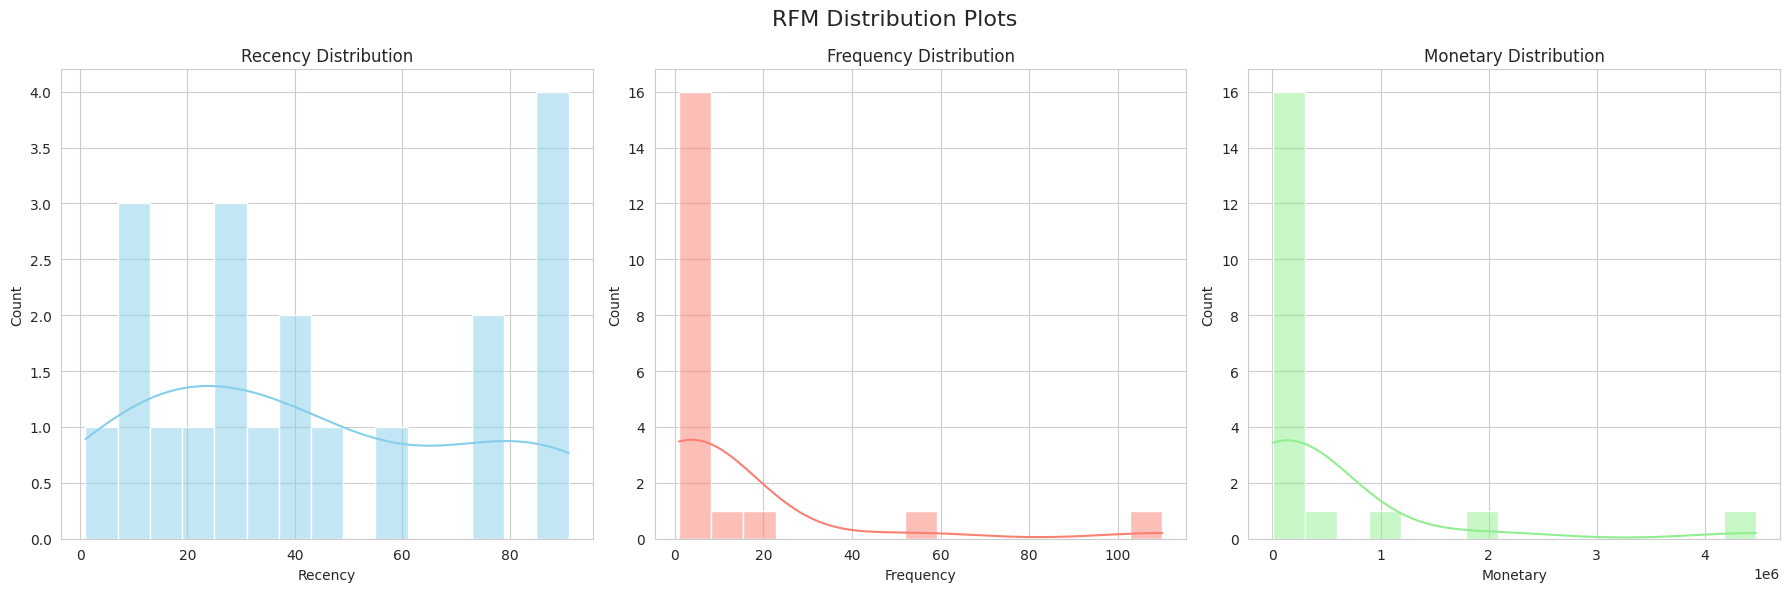

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style
sns.set_style('whitegrid')
plt.figure(figsize=(18, 6))

# Plot Recency Distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=15, kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

# Plot Frequency Distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=15, kde=True, color='salmon')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

# Plot Monetary Distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=15, kde=True, color='lightgreen')
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('Count')

plt.suptitle('RFM Distribution Plots', fontsize=16)
plt.tight_layout()
plt.show()

## K-MEANS

In [32]:
rfm_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BUYER      20 non-null     object 
 1   Recency    20 non-null     int64  
 2   Frequency  20 non-null     int64  
 3   Monetary   20 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 772.0+ bytes


In [33]:
from sklearn.preprocessing import StandardScaler

# Copying rfm_k to a new variable
rfm_clustering = rfm_k[['Recency', 'Frequency', 'Monetary']]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
rfm_scaled = scaler.fit_transform(rfm_clustering)


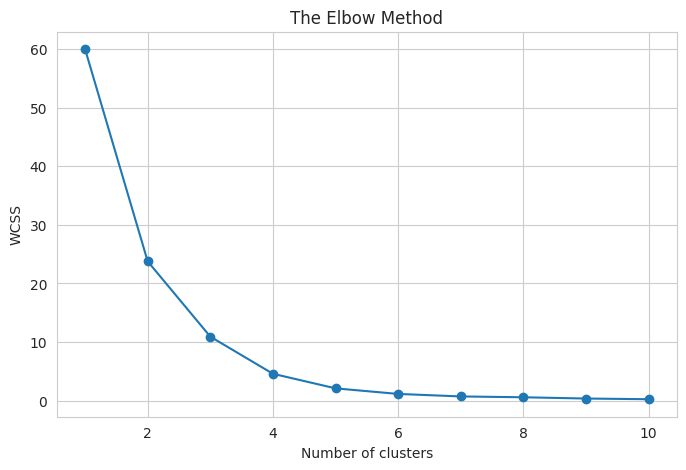

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Empty list to hold WCSS values
wcss = []

# Try different cluster sizes
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within-cluster sum of squares
plt.show()


In [35]:
# Build KMeans with optimal k
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(rfm_scaled)

# Assign the cluster labels
rfm_k['Cluster'] = kmeans.labels_

In [36]:
# Create cluster profile
cluster_profile = rfm_k.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'BUYER': 'count'
}).rename(columns={'BUYER': 'Count'}).reset_index()

# Define cluster labels manually
cluster_labels = {
    0: 'Loyal Customers',
    1: 'Top VIP Customer',
    2: 'At Risk / Churned Customers'
}

# Map labels to clusters
cluster_profile['Cluster Label'] = cluster_profile['Cluster'].map(cluster_labels)

# Reorder columns for better display
cluster_profile = cluster_profile[['Cluster', 'Cluster Label', 'Recency', 'Frequency', 'Monetary', 'Count']]

# Optional: sort by cluster number for readability
cluster_profile = cluster_profile.sort_values(by='Cluster').reset_index(drop=True)

# Print the final table
print(cluster_profile.to_string(index=False))


 Cluster               Cluster Label   Recency  Frequency  Monetary  Count
       0             Loyal Customers 25.166667   9.166667  356110.0     12
       1            Top VIP Customer  1.000000 110.000000 4474156.6      1
       2 At Risk / Churned Customers 79.857143   2.285714  105275.0      7


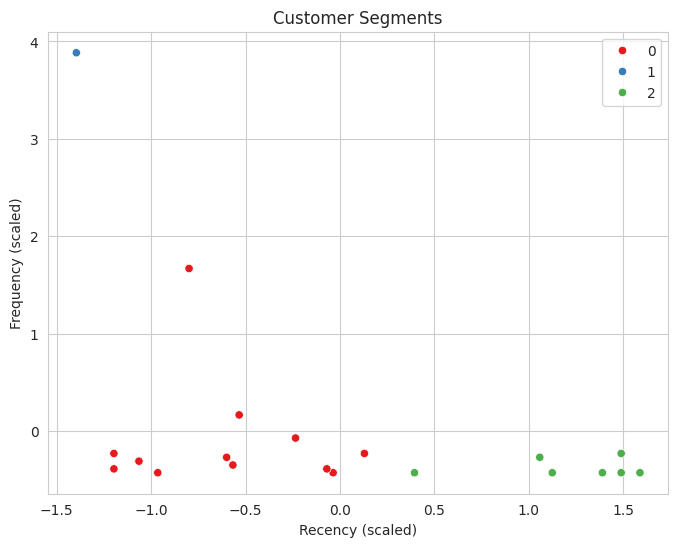

In [37]:
import seaborn as sns

# 2D Plot using first two features
plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm_scaled[:,0], y=rfm_scaled[:,1], hue=rfm_k['Cluster'], palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Recency (scaled)')
plt.ylabel('Frequency (scaled)')
plt.legend()
plt.show()

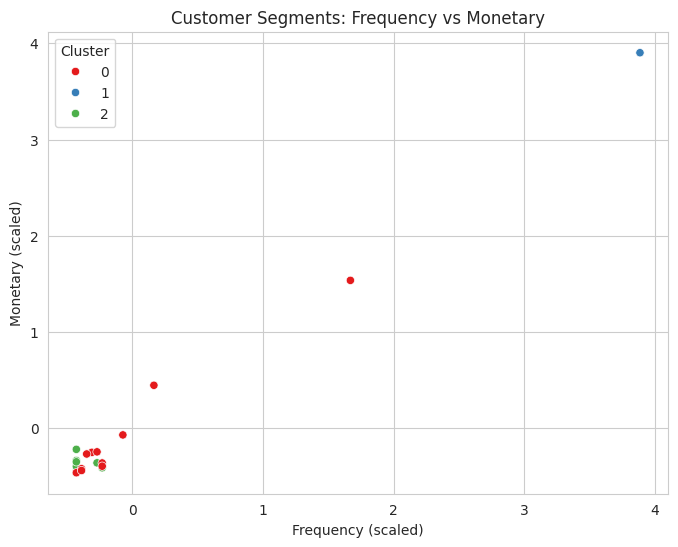

In [38]:
# 2D Plot for Frequency vs Monetary
plt.figure(figsize=(8,6))
sns.scatterplot(x=rfm_scaled[:,1],  # Frequency (scaled)
                y=rfm_scaled[:,2],  # Monetary (scaled)
                hue=rfm_k['Cluster'],
                palette='Set1')
plt.title('Customer Segments: Frequency vs Monetary')
plt.xlabel('Frequency (scaled)')
plt.ylabel('Monetary (scaled)')
plt.legend(title='Cluster')
plt.show()